**Eigenvector Centrality Iteration**

In [2]:
import numpy as np

# Adjacency matrix for the toy graph
# A-B-C form a triangle, D connects only to A
A = np.array([
    [0,1,1,1],  # A
    [1,0,1,0],  # B
    [1,1,0,0],  # C
    [1,0,0,0]   # D
])

# Initial vector x(0) = [1,1,1,1]
x = np.array([1,1,1,1])

print("Step 0:", x, "normalized:", (x/x.sum()).round(3))

for step in range(1, 11):  # steps 1 through 10
    x = A @ x  # multiply by adjacency
    normalized = x / x.sum()  # make entries sum to 1
    print(f"Step {step}: raw={x}, normalized={normalized.round(3)}")


Step 0: [1 1 1 1] normalized: [0.25 0.25 0.25 0.25]
Step 1: raw=[3 2 2 1], normalized=[0.375 0.25  0.25  0.125]
Step 2: raw=[5 5 5 3], normalized=[0.278 0.278 0.278 0.167]
Step 3: raw=[13 10 10  5], normalized=[0.342 0.263 0.263 0.132]
Step 4: raw=[25 23 23 13], normalized=[0.298 0.274 0.274 0.155]
Step 5: raw=[59 48 48 25], normalized=[0.328 0.267 0.267 0.139]
Step 6: raw=[121 107 107  59], normalized=[0.307 0.272 0.272 0.15 ]
Step 7: raw=[273 228 228 121], normalized=[0.321 0.268 0.268 0.142]
Step 8: raw=[577 501 501 273], normalized=[0.312 0.271 0.271 0.147]
Step 9: raw=[1275 1078 1078  577], normalized=[0.318 0.269 0.269 0.144]
Step 10: raw=[2733 2353 2353 1275], normalized=[0.314 0.27  0.27  0.146]


**Example: Eigenvector Centrality**

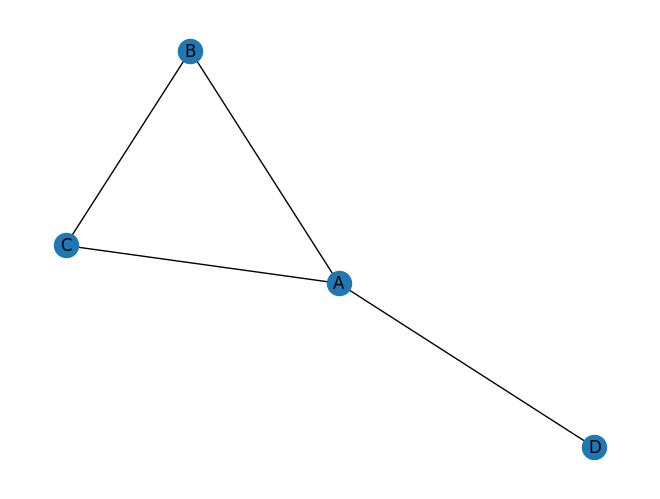

{'A': 0.612, 'B': 0.523, 'C': 0.523, 'D': 0.282}


In [3]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from([("A","B"),("A","C"),("A","D"),("B","C")])

nx.draw(G, with_labels=True)
plt.show()

eig = nx.eigenvector_centrality(G)
print({n: round(s,3) for n,s in eig.items()})


**PageRank**

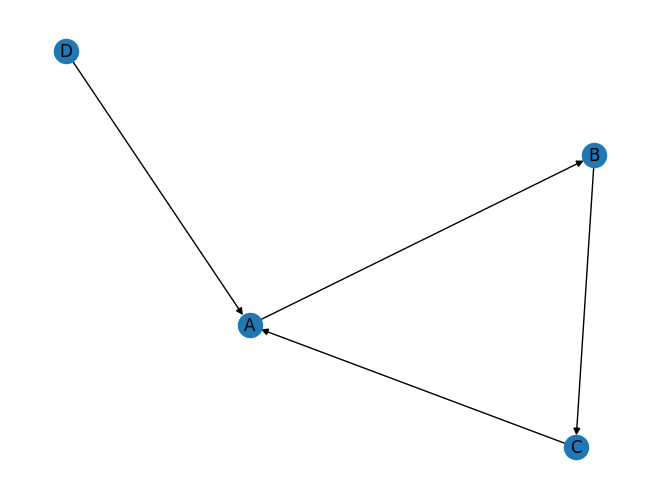

{'A': 0.333, 'B': 0.32, 'C': 0.31, 'D': 0.038}


In [4]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from([("A","B"),("B","C"),("C","A"),("D","A")])

nx.draw(G, with_labels=True)
plt.show()

pr = nx.pagerank(G, alpha=0.85)
print({n: round(s,3) for n,s in pr.items()})


**Eigenvectore Centrality In-Class Activity**

{0: 0.439, 1: 0.161, 2: 0.439, 3: 0.473, 4: 0.527, 5: 0.144, 6: 0.083, 7: 0.092, 8: 0.059, 9: 0.018, 10: 0.028, 11: 0.214}


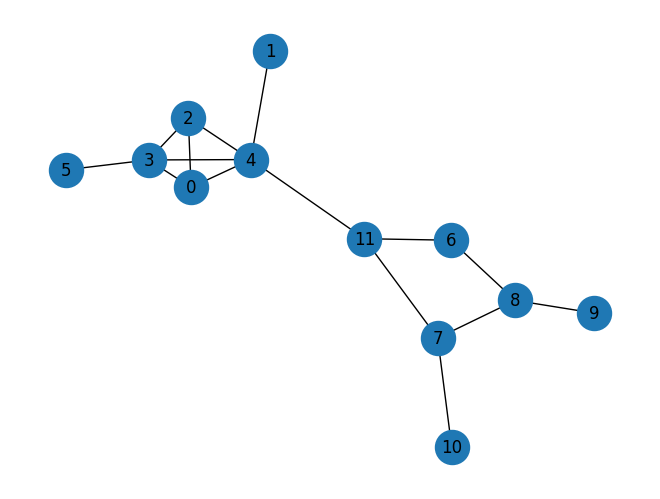

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Undirected graph: 2 groups, 6 nodes each
G1 = nx.planted_partition_graph(l=2, k=6, p_in=0.4, p_out=0.05, seed=42)

eig = nx.eigenvector_centrality(G1)
print({n: round(s,3) for n,s in eig.items()})

nx.draw(G1, with_labels=True, node_size=600)
plt.show()



Discussion Questions

Which nodes score highest in eigenvector centrality?

Do they sit inside dense clusters or on the bridges between them?

How does this compare to degree centrality (nx.degree_centrality)?

****PageRank In-Class Activity****
Citation-style directed graph

{'A': 0.025, 'B': 0.172, 'C': 0.245, 'D': 0.025, 'E': 0.275, 'F': 0.259}


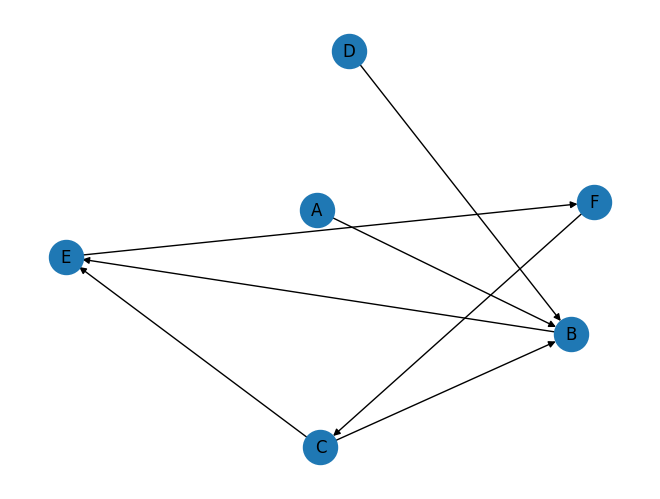

In [6]:
# Directed graph: simple citation-like structure
G2 = nx.DiGraph()
edges = [
    ("A","B"), ("C","B"), ("D","B"),  # B is cited by many
    ("B","E"), ("C","E"),             # E cited by B and C
    ("E","F"), ("F","C")              # feedback loop between C and F
]
G2.add_edges_from(edges)

pr = nx.pagerank(G2, alpha=0.85)
print({n: round(s,3) for n,s in pr.items()})

nx.draw(G2, with_labels=True, node_size=600, arrows=True)
plt.show()


Discussion Questions:

Which nodes have the highest PageRank?

Why does B rank highly even though it doesn’t link out much?

How does teleportation (α=0.85) help deal with “sinks” in this directed network?